## Demo: Son Depremler

#### Kullanılacak kütüphaner

In [6]:
import numpy as np  
import pandas as pd

import io
from urllib.request import urlopen
from bs4 import BeautifulSoup

### Verileri okuyalım

In [1]:
url = "http://www.koeri.boun.edu.tr/scripts/lst4.asp"

In [22]:
#pd.read_html #html tablo okur. bu sayfada veriler pre içerisinde düz metin halinde duruyor
#pd.read_csv(url) #düz metin bekler encode edilmiş byte string gördü

cevap = urlopen(url)  #http response objesi döner
cevap = cevap.read()   #byte string döner

#
soup = BeautifulSoup(cevap, 'html.parser') 

#
str_son_depremler = soup.pre.text
#print(str_son_depremler)

In [33]:
io_son_depremler = io.StringIO(str_son_depremler)

#
df_son_depremler = pd.read_csv(io_son_depremler, delimiter="\s+",
                                skiprows=7,
                                usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                                names=['Tarih', 'Saat', 'Enlem', 'Boylam', 'Derinlik', 'MD', 'ML', 'Mw', 'Yer', 'Tip'],
                                parse_dates=[['Tarih', 'Saat']],
                                index_col='Tarih_Saat'
                                )


df_son_depremler.dtypes
#
df_son_depremler.head()

,Enlem,Boylam,Derinlik,MD,ML,Mw,Yer,Tip
Tarih_Saat,,,,,,,,
2024-06-05 15:07:24,38.8092,37.4990,5.0,-.-,1.7,-.-,BAGLICAY-GURUN,(SIVAS)
2024-06-05 14:34:06,40.8950,39.7465,8.5,-.-,1.4,-.-,ESENYURT-(TRABZON),İlksel
2024-06-05 13:02:36,39.3688,29.2528,0.0,-.-,1.5,-.-,EMET,(KUTAHYA)
2024-06-05 12:36:51,36.1000,33.5340,2.2,-.-,1.3,-.-,YANISLI-GULNAR,(MERSIN)
2024-06-05 12:34:23,40.1185,32.9250,17.7,-.-,1.8,-.-,PURSAKLAR,(ANKARA)


Q1=1.475
Q2=2.2
0.7250000000000001
alt_sinir=0.38749999999999996
ust_sinir=3.2875000000000005


,Enlem,Boylam,Derinlik,MD,ML,Mw,Yer,Tip
Tarih_Saat,,,,,,,,
2024-06-05 10:37:48,36.0768,35.9168,12.0,-.-,4.1,4.0,MAGARACIK-SAMANDAG,(HATAY)
2024-06-04 06:42:49,35.9868,27.2385,8.0,-.-,3.3,3.3,AKDENIZ,İlksel
2024-06-04 04:30:57,42.5252,43.2448,5.0,-.-,3.3,3.3,GURCISTAN,İlksel
2024-06-04 01:03:42,42.4973,43.2123,2.8,-.-,5.0,5.0,GURCISTAN,İlksel
2024-06-03 17:02:50,40.6510,42.0682,5.0,-.-,3.4,3.4,TUTLU-OLTU,(ERZURUM)
2024-06-02 13:52:45,38.4560,37.1242,5.0,-.-,3.3,3.3,UNCULAR-ELBISTAN,(KAHRAMANMARAS)
2024-06-02 11:53:41,37.6692,24.4913,5.9,-.-,4.1,4.1,EGE,DENIZI
2024-06-02 04:19:04,38.7938,25.4790,2.7,-.-,3.3,3.1,EGE,DENIZI
2024-05-31 12:32:56,37.9542,36.2515,5.3,-.-,3.3,3.2,KALEBOYNU-GOKSUN,(KAHRAMANMARAS)


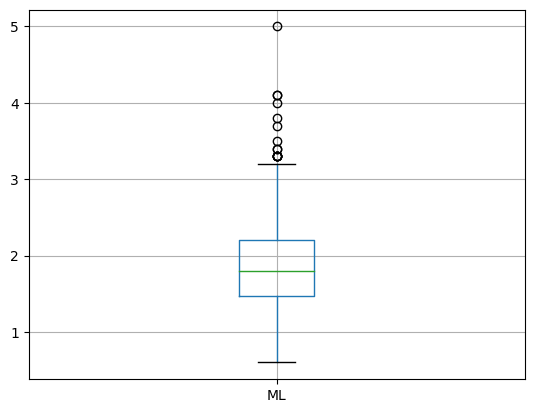

In [45]:
df_son_depremler.query("Yer.str.contains('TRABZON')")

#
df_son_depremler.loc[:,["ML"]]
#ML'nin anlamı nedir? Moment Magnitude

#
df_son_depremler.loc[:,["ML"]].boxplot() #1.5 IQR ile outlierları belirler

#-----------------------
Q1 = df_son_depremler["ML"].quantile(0.25)
Q2 = df_son_depremler["ML"].quantile(0.75)

#
IQR = Q2 - Q1


#üst ve alt outlier sınırlarını hesapla
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q2 + 1.5 * IQR

print(f"{Q1=}\n{Q2=}\n{IQR}")
print(f"{alt_sinir=}\n{ust_sinir=}")

#
df_son_depremler.query("ML < @alt_sinir or ML > @ust_sinir")

In [53]:
df_siddetli_son_depremler = df_son_depremler.query("ML > @ust_sinir").loc[:,["ML"]]

#df_siddetli_son_depremler.groupby 
#zamansal verileri groupby benzeri işlevler sunan daha pratik çözüm var.resample
#Y = yıl, M = ay, D = gün, H = saat, T = dakika, S = saniye
df_siddetli_son_depremler.resample("M") \
                         .agg(["count", "mean", "min", "max"]) \
                         .fillna("Deprem olmadı")

ML                    
           count      mean  min  max
Tarih_Saat                          
2024-05-31     7  3.571429  3.3  4.0
2024-06-30     8  3.725000  3.3  5.0

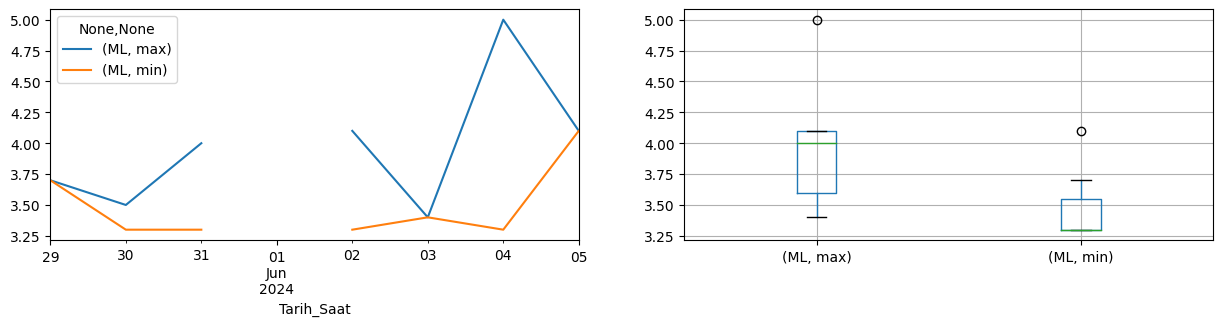

In [57]:
import matplotlib.pyplot as plt


df_siddetli_son_depremler_max_min = df_siddetli_son_depremler.resample("D").agg(["max","min"])

#1 satır 2 sutunluk çizim alanı oluştur.
fig, ax = plt.subplots(1,2, figsize=(15,3))

#axeslere çizim yap
df_siddetli_son_depremler_max_min.plot(ax=ax[0])
df_siddetli_son_depremler_max_min.boxplot(ax=ax[1])

#
plt.show()

In [58]:
df_siddetli_son_depremler_max_min

ML     
            max  min
Tarih_Saat          
2024-05-29  3.7  3.7
2024-05-30  3.5  3.3
2024-05-31  4.0  3.3
2024-06-01  NaN  NaN
2024-06-02  4.1  3.3
2024-06-03  3.4  3.4
2024-06-04  5.0  3.3
2024-06-05  4.1  4.1